## Outlier detection with Isolation Forest (For Krombacher ;))

### Install necessary bibs if needed.. ipympl is for interactive 3d plots

In [1]:
!pip install sklearn ipympl
# pip install --upgrade jupyterlab ipympl

### Import bibs. Gaussian quantiles is for random 3d dataset

In [2]:
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

Create random 3d dataset with gaussian distribution. You don't need to do this as you have already a dataset!

In [3]:
X1, y1 = make_gaussian_quantiles(cov=1., n_samples=1000, n_features=3, n_classes=1, random_state=1)

In [4]:
X1 = pd.DataFrame(X1, columns=['x', 'y', 'z'])

In [5]:
X1

,x,y,z
0,1.155262,0.346058,-0.133489
1,0.742057,0.981994,0.438562
2,0.352494,-0.236437,0.727813
3,-0.312230,-0.710656,1.131129
4,0.633509,-1.692303,-0.425071
...,...,...,...
995,-0.845206,-0.671246,-0.012665
996,2.054475,-0.591566,-0.379689
997,0.486910,-0.764340,0.286331
998,-0.749970,2.054624,0.053410


### Scatter Plot of random dataset


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
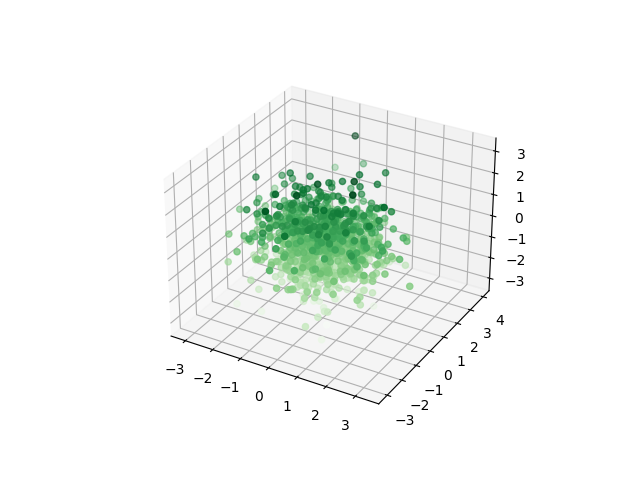

In [7]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1['x'], X1['y'], X1['z'], c=X1['z'], cmap='Greens')

### Use IsolationForest to identify outliers (Anomalies) for this dataset --> replace X1 by dataset you want

In [7]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
# replace X1 by your dataset!
clf.fit(X1)
pred = clf.predict(X1)
# outliers are stored with anomaly column == -1
X1['anomaly']=pred
outliers=X1.loc[X1['anomaly']==-1]
outlier_index=list(outliers.index)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
outliers

,x,y,z,anomaly
16,1.388779,-0.661344,3.030857,-1
29,-1.470237,0.606404,2.293718,-1
38,-0.131706,2.172333,1.177070,-1
43,-0.904289,1.628239,-1.847188,-1
46,-0.106460,-2.790996,-0.456118,-1
...,...,...,...,...
955,0.964888,2.424307,2.150354,-1
956,-1.111373,2.301635,-0.233441,-1
958,-0.839989,-2.298206,1.456527,-1
976,2.190700,-1.896361,-0.646917,-1


In [9]:
X1['x'][outlier_index]

16     1.388779
29    -1.470237
38    -0.131706
43    -0.904289
46    -0.106460
         ...   
955    0.964888
956   -1.111373
958   -0.839989
976    2.190700
994    1.013822
Name: x, Length: 120, dtype: float64

## Plot dataset with outliers in red

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
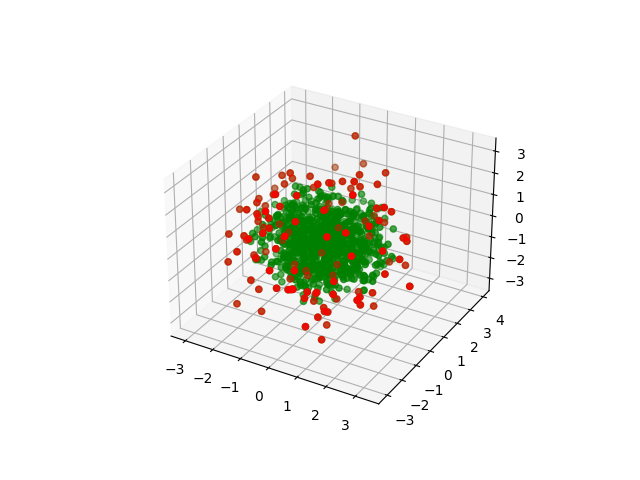

In [10]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1['x'], X1['y'], X1['z'], color='g')
ax.scatter3D(X1['x'][outlier_index], X1['y'][outlier_index], X1['z'][outlier_index], color='r')